In [1]:
!pip install tensorflow
!pip install matplotlib

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
  layer.trainable =False

In [4]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation ="sigmoid")
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
import os
from PIL import Image

os.makedirs('sample_data/class_a',exist_ok= True)
os.makedirs('sample_data/class_b', exist_ok=True)

for i in range(10):
  img = Image.fromarray(np.zeros((224,224,3),dtype=np.uint8))
  img.save(f'sample_data/class_a/image_{i}.jpg')

  img = Image.fromarray(np.ones((224,224,3),dtype=np.uint8)*255)
  img.save(f'sample_data/class_b/img_{i}.jpg')

In [6]:
# modify data generator to include validation data
# plot the training data validation loss for each other

train_datagen= ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary',
    subset = 'validation'
)

# train the model
model_validation = model.fit(train_generator, epochs =10 ,validation_data = validation_generator)



print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes}classes.')

if train_generator.samples >0:
  model.fit(train_generator , epochs =10)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.8707 - val_accuracy: 0.5000 - val_loss: 5.6078
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5000 - loss: 5.6078 - val_accuracy: 0.5000 - val_loss: 3.3053
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5000 - loss: 3.3053 - val_accuracy: 0.5000 - val_loss: 0.4761
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5000 - loss: 0.4761 - val_accuracy: 0.5000 - val_loss: 0.7364
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5000 - loss: 0.7364 - val_accuracy: 0.5000 - val_loss: 0.8000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5000 - loss: 0.8000 - val_accuracy: 0.5000 - val_loss: 0.8158
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5000 - loss: 0.8158 - val_accuracy: 0.5000 - val_loss: 0.8191
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5000 - loss: 0.8191 - val_accuracy: 0.5000 - val_loss: 0.8120
Epoc

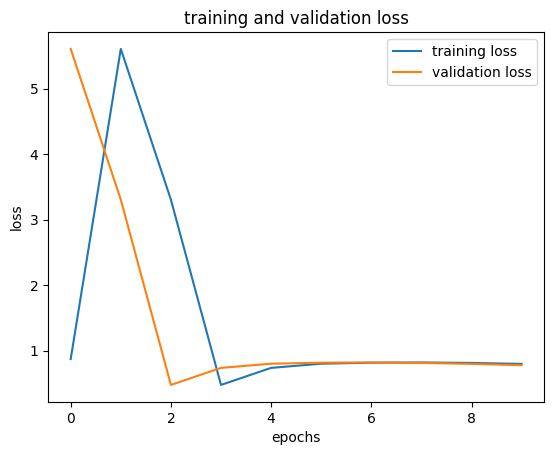

In [7]:
# plot training model and validation
plt.plot(model_validation.history['loss'], label='training loss')
plt.plot(model_validation.history['val_loss'], label='validation loss')
plt.title("training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
# change the optimizer adam to sgd and rmprop
# retrain the model with each optimizer and compare the accuracy

from tensorflow.keras.models import clone_model

def reset_model(model):
  model_clone = clone_model(model)
  model_clone.set_weights(model.get_weights())
  return model_clone


initial_model = reset_model(model)

# sgd optimizer
sgd_model =reset_model(initial_model)
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd= sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)


# rms optimizer
rms_model = reset_model(initial_model)
rms_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
rms_model_history = rms_model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6359 - val_accuracy: 0.5000 - val_loss: 0.6112
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5000 - loss: 0.6112 - val_accuracy: 1.0000 - val_loss: 0.6058
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 1.0000 - loss: 0.6058 - val_accuracy: 0.5000 - val_loss: 0.6092
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5000 - loss: 0.6092 - val_accuracy: 0.5000 - val_loss: 0.5998
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5000 - loss: 0.5998 - val_accuracy: 0.5000 - val_loss: 0.5908
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5000 - loss: 0.5908 - val_accuracy: 1.0000 - val_loss: 0.5930
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 1.0000 - loss: 0.5930 - val_accuracy: 0.5000 - val_loss: 0.5946
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5000 - loss: 0.5946 - val_accuracy: 0.5000 - val_loss: 0.

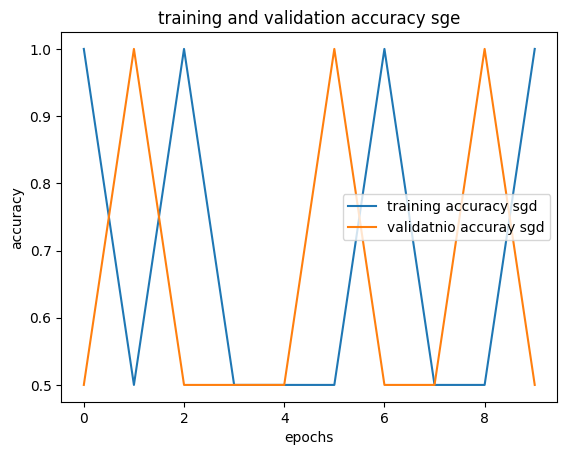

In [9]:
plt.plot(history_sgd.history['accuracy'],label ='training accuracy sgd')
plt.plot(history_sgd.history['val_accuracy'],label="validatnio accuray sgd")
plt.title("training and validation accuracy sge")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

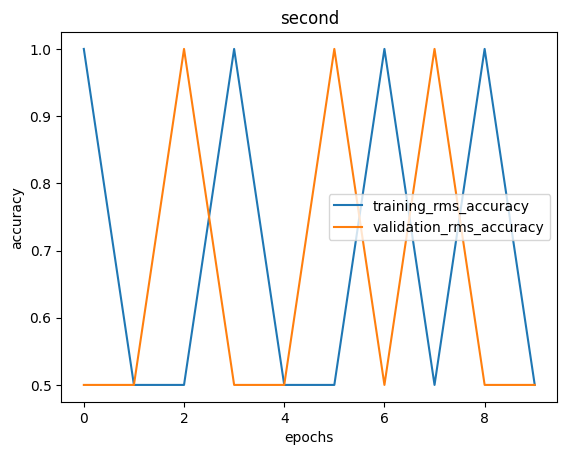

In [10]:
plt.plot(rms_model_history.history['accuracy'], label = 'training_rms_accuracy')
plt.plot(rms_model_history.history['val_accuracy'],label= 'validation_rms_accuracy')
plt.title("second")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()


In [12]:
# load the test_generator
test_generator = ImageDataGenerator(rescale=1/.255)
test_generator = test_generator.flow_from_directory(
    "sample_data",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'

)

# evaluate
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")
print(f"text loss:{test_loss}")

Found 20 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 1.0000 - loss: 0.3097
Test accuracy: 1.0
text loss:0.3096804916858673
